In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [148]:
import io

In [149]:
from google.colab import files
uploaded = files.upload()

Saving TSM.csv to TSM.csv


In [150]:
df = pd.read_csv(io.BytesIO(uploaded['TSM.csv']))
print(df)

          Date        Open        High         Low       Close   Adj Close
0     2/8/2023   95.019997   95.940002   94.230003   94.279999   92.482452
1     2/9/2023   96.000000   98.570000   95.620003   96.690002   94.846504
2    2/10/2023   95.949997   96.500000   94.250000   95.370003   93.551674
3    2/13/2023   95.470001   96.389999   94.910004   96.110001   94.277557
4    2/14/2023   95.820000   98.989998   95.220001   97.959999   96.092293
..         ...         ...         ...         ...         ...         ...
246   2/1/2024  113.800003  114.029999  112.610001  113.389999  113.389999
247   2/2/2024  114.860001  115.959999  113.919998  115.750000  115.750000
248   2/5/2024  117.129997  119.540001  116.580002  118.790001  118.790001
249   2/6/2024  120.120003  120.989998  118.279999  119.379997  119.379997
250   2/7/2024  120.010002  125.000000  120.000000  124.980003  124.980003

[251 rows x 6 columns]


In [151]:
data_training = df[df['Date'] < '2020-03-15'].copy()
data_testing = df[df['Date'] >= '2020-03-15'].copy()

In [152]:
data_training = data_training.drop(['Date'], axis = 1)

In [153]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.27561314, 0.24656474, 0.26476477, 0.2241596 , 0.18696403],
       [0.30389606, 0.3147524 , 0.3044224 , 0.2850644 , 0.24610877],
       [0.30245297, 0.26108374, 0.2653353 , 0.25170582, 0.21371423],
       [0.28860027, 0.25823176, 0.28416565, 0.2704068 , 0.23187464],
       [0.29870125, 0.32564164, 0.29301007, 0.31715935, 0.27727639],
       [0.19797982, 0.18796992, 0.16604849, 0.18574673, 0.14966113],
       [0.15901881, 0.13896814, 0.14065619, 0.13671964, 0.10205078],
       [0.12987012, 0.10033713, 0.11383751, 0.11852399, 0.08438111],
       [0.08398256, 0.07752134, 0.07218276, 0.0563557 , 0.02400924],
       [0.06580083, 0.04303853, 0.04878764, 0.03588572, 0.00413073],
       [0.13939399, 0.14415344, 0.12867337, 0.11801865, 0.08389017],
       [0.07561313, 0.0445943 , 0.06533526, 0.06823344, 0.03554361],
       [0.09321777, 0.06274301, 0.06533526, 0.04776343, 0.01566531],
       [0.04819619, 0.0445943 , 0.05563495, 0.04195087, 0.01002056],
       [0.04935062, 0.05159445, 0.

In [154]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-20:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [155]:
x_train.shape

(43, 20, 5)

In [156]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [157]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 80, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 120, activation = 'relu'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units = 1))

In [158]:
regressorGRU.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_24 (GRU)                (None, 20, 60)            12060     
                                                                 
 dropout_24 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_25 (GRU)                (None, 20, 60)            21960     
                                                                 
 dropout_25 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_26 (GRU)                (None, 20, 80)            34080     
                                                                 
 dropout_26 (Dropout)        (None, 20, 80)            0         
                                                                 
 gru_27 (GRU)                (None, 120)              

In [159]:
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressorGRU.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
2/2 [==============================] - 6s 85ms/step - loss: 0.3915
Epoch 2/50
2/2 [==============================] - 0s 80ms/step - loss: 0.2961
Epoch 3/50
2/2 [==============================] - 0s 82ms/step - loss: 0.1954
Epoch 4/50
2/2 [==============================] - 0s 81ms/step - loss: 0.0952
Epoch 5/50
2/2 [==============================] - 0s 73ms/step - loss: 0.0480
Epoch 6/50
2/2 [==============================] - 0s 81ms/step - loss: 0.0380
Epoch 7/50
2/2 [==============================] - 0s 91ms/step - loss: 0.0583
Epoch 8/50
2/2 [==============================] - 0s 72ms/step - loss: 0.0362
Epoch 9/50
2/2 [==============================] - 0s 81ms/step - loss: 0.0184
Epoch 10/50
2/2 [==============================] - 0s 77ms/step - loss: 0.0257
Epoch 11/50
2/2 [==============================] - 0s 73ms/step - loss: 0.0272
Epoch 12/50
2/2 [==============================] - 0s 89ms/step - loss: 0.0322
Epoch 13/50
2/2 [==============================] - 0s 80ms/st

In [160]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close
14,3/1/2023,89.040001,90.040001,88.269997,88.419998,86.734169
15,3/2/2023,87.639999,89.339996,87.120003,89.029999,87.332542
16,3/3/2023,88.669998,89.849998,87.879997,89.790001,88.078056
17,3/6/2023,90.080002,91.330002,89.510002,89.580002,87.872063
18,3/7/2023,89.949997,90.239998,88.300003,88.849998,87.155975


In [161]:
past_20_days = data_testing.tail(20)

In [162]:
df = past_20_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-162-08f6f3976b94>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_20_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close
0,94.300003,94.580002,93.089996,93.190002,92.273972
1,93.400002,95.050003,92.870003,94.599998,93.670105
2,93.849998,93.959999,91.589996,92.260002,91.353111
3,90.070000,90.290001,88.430000,90.050003,89.164841
4,90.750000,91.070000,89.320000,89.639999,88.758865


In [163]:
inputs = scaler.transform(df)
inputs

array([[ 0.2548341 ,  0.21130417,  0.23223961,  0.19661355,  0.1817482 ],
       [ 0.22886004,  0.22348984,  0.22596306,  0.23224651,  0.21667718],
       [ 0.24184694,  0.19522943,  0.18944361,  0.1731109 ,  0.15870975],
       [ 0.1327561 ,  0.10007781,  0.09928681,  0.11726053,  0.10396279],
       [ 0.15238091,  0.12030075,  0.1246791 ,  0.10689904,  0.09380593],
       [ 0.13362184,  0.10267044,  0.12011431,  0.10588815,  0.0928151 ],
       [ 0.14401148,  0.13326419,  0.15606278,  0.12812735,  0.11461476],
       [ 0.14805185,  0.14156077,  0.15777477,  0.14682833,  0.13294658],
       [ 0.21096674,  0.16852476,  0.18031382,  0.15314625,  0.15090011],
       [ 0.14545457,  0.12211561,  0.11155503,  0.09704312,  0.09561981],
       [ 0.08860028,  0.08400306,  0.09928681,  0.08642906,  0.0851614 ],
       [ 0.08600277,  0.06248369,  0.08102721,  0.06974966,  0.06872668],
       [ 0.08802297,  0.0749287 ,  0.06676188,  0.04751067,  0.04681384],
       [ 0.01645022, -0.00751882,  0.0

In [164]:
x_test = []
y_test = []

for i in range(20, inputs.shape[0]):
    x_test.append(inputs[i-20:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((148, 20, 5), (148,))

In [165]:
x_test.shape

(148, 20, 5)

In [166]:
y_pred = regressorGRU.predict(x_test)

5/5 [==============================] - 1s 29ms/step


In [167]:
scaler.scale_

array([0.02886003, 0.02592689, 0.02853067, 0.02527167, 0.02501838])

In [168]:
scale = 1 / 0.02886003
scale

34.649998631325055

In [169]:
y_pred = y_pred * scale
y_test = y_test * scale

In [170]:
y_pred.shape

(148, 1)

In [171]:
y_test.shape

(148,)

In [172]:
y_pred[78:]

array([[18.499022 ],
       [18.169287 ],
       [17.756786 ],
       [17.307724 ],
       [16.920181 ],
       [16.583649 ],
       [16.290497 ],
       [16.06435  ],
       [16.014736 ],
       [16.035088 ],
       [15.921861 ],
       [15.734957 ],
       [15.526054 ],
       [15.419114 ],
       [15.554945 ],
       [15.955736 ],
       [16.54637  ],
       [17.09781  ],
       [17.430067 ],
       [17.576323 ],
       [17.314554 ],
       [16.687706 ],
       [15.922841 ],
       [15.321242 ],
       [14.9214945],
       [14.72652  ],
       [14.699609 ],
       [14.691012 ],
       [14.617454 ],
       [14.365433 ],
       [13.926627 ],
       [13.454292 ],
       [13.049309 ],
       [12.65642  ],
       [12.283188 ],
       [11.976374 ],
       [11.637005 ],
       [11.263707 ],
       [10.870781 ],
       [10.49269  ],
       [10.166912 ],
       [ 9.856181 ],
       [ 9.61134  ],
       [ 9.472039 ],
       [ 9.496504 ],
       [ 9.64987  ],
       [ 9.804621 ],
       [ 9.95

In [173]:
y_test[78:]

array([15.94999545, 16.04999444, 16.54999439, 15.67999948, 15.02999754,
       15.86999346, 15.92999945, 16.77999737, 15.92999945, 13.62999567,
       13.60999968, 14.77999756, 16.85999936, 17.35999931, 19.5299971 ,
       20.529997  , 19.20999713, 18.21999923, 18.42999921, 13.08000073,
       12.40999479, 11.79999485, 14.04999463, 14.01999564, 16.02999744,
       14.63999858, 13.70999767, 13.66999667, 12.02999783,  9.36999409,
        9.80999705, 11.26000091,  9.40999509, 10.35999999,  9.97999503,
        8.02999822,  6.2200004 ,  7.04999531,  5.97000042,  7.44999628,
        4.59999855,  5.02999851,  7.87999623,  8.31999919, 11.05999692,
        6.77999834,  8.34999819,  8.29999519,  9.97999503,  7.86999423,
        8.83000114,  7.93000023,  8.37999619,  4.59999855,  5.27999849,
        4.62999655,  4.98999751,  5.1299965 ,  7.30999729,  5.04000051,
        3.0699997 ,  2.97999571,  3.0499957 ,  0.56999994,  0.77999892,
       -0.08000199, -0.52000395, -0.30000297, -0.22000098,  2.27

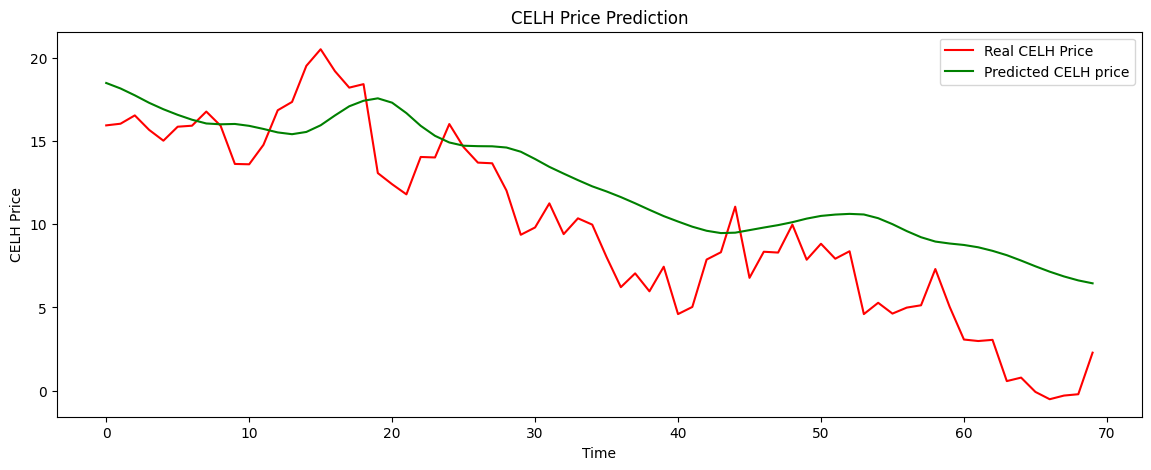

In [174]:
plt.figure(figsize = (14,5))
plt.plot(y_test[78:], color = 'red', label = 'Real CELH Price')
plt.plot(y_pred[78:], color = 'green', label = 'Predicted CELH price')
plt.title('CELH Price Prediction')
plt.xlabel('Time')
plt.ylabel('CELH Price')
plt.legend()
plt.show()